# Sumário

[Introdução](#Introdução)

[Função de Custo](#Função-de-Custo)

[Regressão Logística](#Regressão-Log%C3%ADstica)
- [Numpy](#Numpy)
- [Keras](#Keras)
- [Tensorflow](#Tensorflow)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

%matplotlib inline

# Introdução

A __Regressão Logística__ é um tipo de regressão linear utilizado para classificação binária. Nesse caso, ao invés de prever um valor contínuo, a nossa saída é composta de apenas dois valores: 0 ou 1.

$$y_{pred} = \frac{1}{1+e^{-z}}$$

Onde $z(w,b) = xw^T + b$

# Função de Custo

A função de custo da regressão logística é definida pela seguinte fórmula:

$$J(z) = -\frac{1}{N}\sum_{i}^N y_i\log(y_{pred_i}) + (1-y_i)\log(1-y_{pred_i})$$

Onde $N$ é quantidade de amostras e $y_i$ representa o valor da $i$-ésima amostra (0 ou 1). Lembrando que $y_{pred_i}$ é agora calculada agora utilizando a função ___sigmoid___, como mostrado na seção anterior.

Para calcular a derivada da nossa função de custo $J(w,b)$, primeiramente vamos calcular $\log(y_{pred_i})$:

$$\log(y_{pred_i}) = log\frac{1}{1+e^{-z}} = log(1) - log(1+e^{-z}) = -log(1+e^{-z})$$

E $\log(1-y_{pred_i})$:

$$\log(1-y_{pred_i}) = log \left(1-\frac{1}{1+e^{-z}}\right) = log(e^{-z}) - log(1+e^{-z}) = -z -log(1+e^{-z})$$

Substituindo as duas equações anteriores na fórmula da função de custo, temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[-y_i\log(1+e^{-z}) + (1-y_i)(-z -\log(1+e^{-z}))\right]$$

Efetuando as distribuições, podemos simplificar a equação acima para:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -z -\log(1+e^{-z})\right]$$

Uma vez que:

$$-z -\log(1+e^{-z}) = -\left[\log e^{z} + log(1+e^{-z})\right] = -log(1+e^z)$$

Temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -\log(1+e^z)\right]$$

Como a derivada da diferença é igual a diferença das derivadas, podemos calcular cada derivada individualmente:

$$\frac{\partial}{\partial z}y_iz = y_ix_i$$

$$\frac{\partial}{\partial z}\log(1+e^z) = \frac{x_ie^z}{1+e^z} = x_i y_{pred_i}$$

Assim, a derivada da nossa função de custo $J(z)$ é:

$$\frac{\partial}{\partial z}J(z) = \sum_i^N (y_i - y_{pred_i})x_i$$

# Regressão Logística

In [2]:
df = pd.read_csv('data/anuncios.csv')
print(df.shape)
df.head()

(400, 3)


,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x, y = df.idade.values.reshape(-1,1), df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


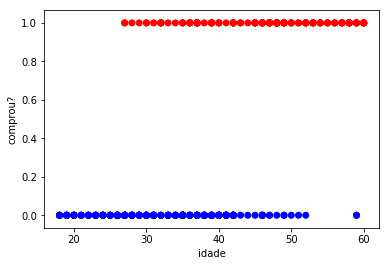

In [4]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [5]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


Vamos utilizar o _sklearn_ como gabarito para nossa implementação. Entretanto, como a Regressão Logística do _sklearn_ faz uma __regularização L2__ automaticamente, temos de definir $C=10^{15}$ para "anular" a regularização. O parâmetro $C$ define a inversa da força da regularização (ver [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). __Logo, quanto menor for o $C$, maior será a regularização e menores serão os valores dos pesos e bias.__

In [6]:
reg = LogisticRegression(C=1e15)
reg.fit(x, y.ravel())

print(reg.coef_, reg.intercept_)
print(reg.score(x, y))

[[ 3.96794202]] [-0.6751072]
0.84


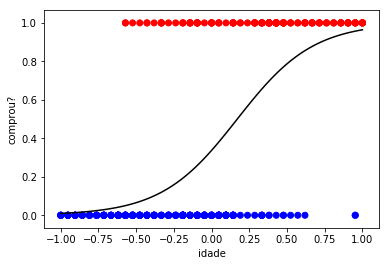

In [7]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = reg.predict_proba(x_test)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [8]:
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1-y)
    else:
        return 1.0/(1.0 + np.exp(-x))

## Numpy 

In [9]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1x1]
b = 2*np.random.random()-1       # [1x1]

for step in range(1001):
    z = np.dot(x, w.T) + b # [400x1]
    y_pred = sigmoid(z)    # [400x1]
    error = y - y_pred     # [400x1]
    
    w = w + 1e-3*np.dot(error.T, x)
    b = b + 1e-3*error.sum()
    
    if step%100 == 0:
        cost = np.mean( -y*np.log(y_pred) -(1-y)*np.log(1-y_pred) )
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 0.7378910468099039
step 100: 0.4398128074724566
step 200: 0.42394187072858963
step 300: 0.42119405777088326
step 400: 0.42055640457166404
step 500: 0.4203903328024951
step 600: 0.4203446906130376
step 700: 0.4203318037965076
step 800: 0.42032811398983083
step 900: 0.4203270496636705
step 1000: 0.4203267414440004
w:  [[ 3.96392998]]
b:  -0.674821803165


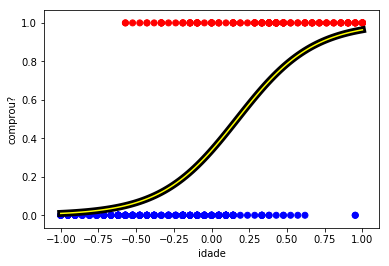

In [10]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = reg.predict_proba(x_test)
y_ = sigmoid(np.dot(x_test, w.T) + b)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black', linewidth=7.0)
plt.plot(x_test, y_, color='yellow')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [11]:
print('Acurácia pelo Scikit-learn: {}'.format(reg.score(x, y)))

y_pred = np.round(sigmoid(np.dot(x, w.T) + b))
print('Acurária pela nossa implementação: {}'.format(accuracy_score(y, y_pred)))

Acurácia pelo Scikit-learn: 0.84
Acurária pela nossa implementação: 0.84


## Keras

## Tensorflow

# Referências

1. [Logistic Regression from Scratch in Python](https://beckernick.github.io/logistic-regression-from-scratch/)